In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [132]:
prosper_df = pd.read_csv('Update_Listings_cleaned_v1.csv', index_col='unique_identifier')

prosper_df.head()

,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,employment_status,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
unique_identifier,,,,,,,,,,,,,,,,,,,,,
0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,0,...,0,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B
1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,0,...,0,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A
2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,0,...,0,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B
3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,0,...,0,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A
4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,0,...,0,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA


In [133]:
X = prosper_df.drop(["lender_yield","borrower_apr","listing_monthly_payment","income_range_description","employment_status_description","occupation","borrower_state","borrower_city","TUFicoRange","CoBorrowerApplication","prosper_rating","rating_num","borrower_state_num", "group_indicator", "dti_wprosper_loan"], axis=1)

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\Saman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [136]:
prosper_df['kmeans_rating'] = clusters

In [137]:
prosper_df.head()

,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,employment_status,...,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating,kmeans_rating
unique_identifier,,,,,,,,,,,,,,,,,,,,,
0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,0,...,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B,1
1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,0,...,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A,1
2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,0,...,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B,0
3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,0,...,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A,0
4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,0,...,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA,1


In [138]:
actual_ratings = prosper_df['rating_num']
kmeans_ratings = prosper_df['kmeans_rating']

In [139]:
accuracy = accuracy_score(actual_ratings, kmeans_ratings)
print("Accuracy:", accuracy)

Accuracy: 0.4856278366111952


In [140]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [141]:
clusters_hierarachy = hierarchical_clustering.fit_predict(X)

In [142]:
prosper_df['hierarachy_rating'] = clusters_hierarachy

In [143]:
hierarachy_ratings = prosper_df['hierarachy_rating']

In [144]:
accuracy_h = accuracy_score(actual_ratings, hierarachy_ratings)
print("Accuracy:", accuracy_h)

Accuracy: 0.5128593040847201


In [145]:
import matplotlib.pyplot as plt
import numpy as np

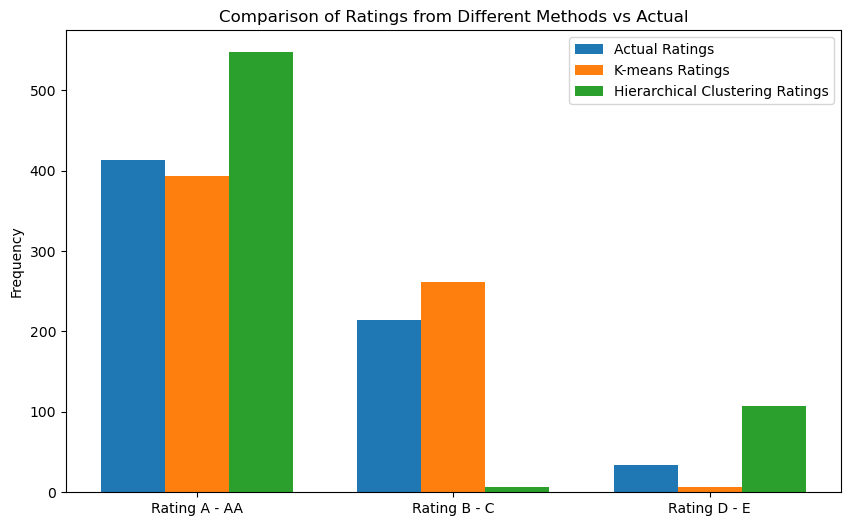

In [146]:
actual_counts = np.bincount(actual_ratings, minlength=3)
kmeans_counts = np.bincount(kmeans_ratings, minlength=3)
hierarchical_counts = np.bincount(hierarachy_ratings, minlength=3)

# Create grouped bar chart
labels = ['Rating A - AA', 'Rating B - C', 'Rating D - E']
x = np.arange(len(labels))
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, actual_counts, width, label='Actual Ratings')
rects2 = ax.bar(x, kmeans_counts, width, label='K-means Ratings')
rects3 = ax.bar(x + width, hierarchical_counts, width, label='Hierarchical Clustering Ratings')

# Add labels, title, and legend
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Ratings from Different Methods vs Actual')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
